In [1]:
import pandas as pd
import numpy as np
import scipy
import sklearn
import statsmodels
import sys

print('Python', sys.version)

for i in [pd, np, scipy, sklearn, statsmodels]:
    print(i.__name__, i.__version__)

Python 3.10.9 (main, Jan 19 2023, 01:50:55) [GCC 8.4.0]
pandas 2.1.1
numpy 1.26.1
scipy 1.11.3
sklearn 1.3.2
statsmodels 0.14.0


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 분석 중급 문제 2번

갯벌의 귀족 머드크랩은 미식가들의 입맛을 사로잡는 진귀한 식재료입니다. 

그래서 사랑받는 만큼 머드크랩의 가격도 상당히 높아 어민들의 좋은 소득원이 되었는데요, 

머드크랩의 최적의 출하 시기를 잡는 것과 머드크랩의 크기는 소득을 증대시키기 위한 중요한 키포인트입니다.

국내에 머드크랩 양식 프로젝트를 맞은 데이터사이언티스트 지희는 데이터분석을 통해 어민의 소득을 향상시키는 프로젝트를 구상중입니다.

본 연구는 머드크랩의 성장데이터를 입니다. 지희를 도와 데이터분석과제를 진행해봅니다.


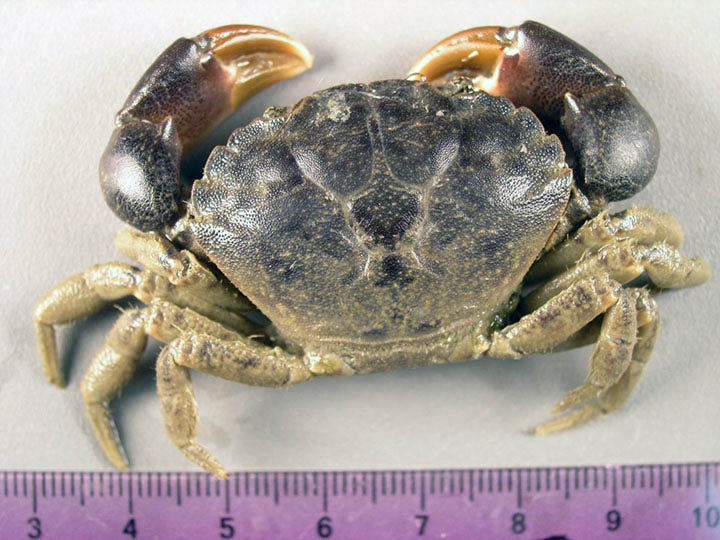

|변수명|설명|타입|
|---|---|---|
|Seq|개체고유번호|정수형|
|Sex|성별, F=Female, M=Male, I=Immature|문자형|
|Length|길이, 단위 feet|실수형|
|Diameter|직경, 단위 feet|실수형|
|Height|높이, 단위 feet|실수형|
|Weight|무게, 단위 ounces|실수형|
|Shucked Weight|껍데기 제거 후 무게, 단위 ounces|실수형|
|Viscera Weight|내장 무게, 단위 ounces|실수형|
|Shell Weight|껍데기 무게, 단위 ounces|실수형|
|Age|월령|정수형|

파일명: crab.csv

본 데이터셋 명을 **crab** 데이터셋으로 합니다.

# 전처리

**Step Pre-1**

(**crab** 에서) 크랩의 무게 측정이 주로 갯벌에서 이루어지다보니 이물질에 의한 측정 오류의 가능성이 큽니다. 

측정 오류가 큰 데이터는 제외하기 위해 다음 작업을 수행합니다.


Weight2 = Shucked Weight + Viscera Weight + Shell Weight

Weight Ratio = $\frac{Weight2}{Weight}$


Weight Ratio 가 아래 범위에 해당하는 것을 제외합니다.

Weight Ratio < Q1 - 1.5 × IQR or Weight Ratio > Q3 + 1.5 × IQR

Q1: 1사분위수, Q3: 3사분위수, IQR = Q3 - Q1

Hint] 제외후 남은 데이터의 수는 3,596개입니다.

# 문제 1

머드크랩의 품질은 껍데기를 제외한 무게가 좌우를 합니다. 

성별과 나이에 따라 껍데기를 제외한 무게의 경향을 파악하기 위해 아래 그림과 같이 박스플롯을 출력했고, 

일정 월령이 지나면 더 이상 늘어나지 않음을 확인했습니다.

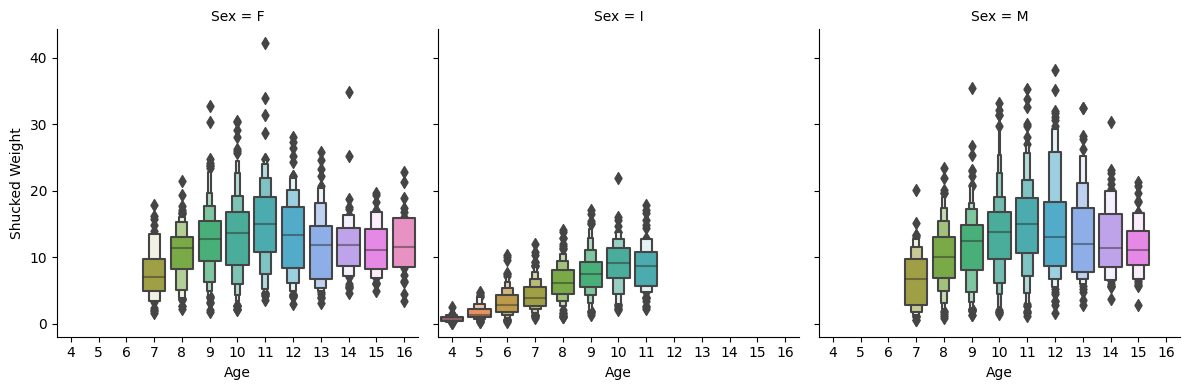

상품성이 높은 머드크랩을 수확하기에 최적의 월령과 그 때의 껍데기를 제외한 무게(Shrucked Weights)를 가늠해 보고자 합니다.

**Step 1-1**

**crab**에서 머드크랩의 동일한 성별(Sex)과 월령(Age) 별 샘플의 빈도를 측정합니다.

|Sex|Age|count|
|---|---|----|
|M|10|260|
|M|9|247|
|I|7|233|
|I|8|231|
|F|10|225|
|...|...|...|

성별(Sex)과 월령(Age)별 빈도수가 25개 이상에 해당하는 샘플들만을 포함하여 **prob1** 셋을 만듭니다.

문제 1에서는 **prob1**셋을 사용합니다.

**Step 1-2**

성별(Sex)로 월령 별 껍데기 제거 후 무게(Shucked Weight)의 평균을 구합니다.

성별로 평균이 가장 큰 월령(Age)을 구합니다.

**Step 1-3**

**Step 1-2**에서 구한 성별 월령대에 해당하는 3개의 표본 집단 각각에 대해,

신뢰수준을 95%로 하여 껍데기 제거 후 무게(Shucked Weight) 모평균의 신뢰구간을 구합니다.

총 3개의 신뢰 구간 중에서 상한선의 최대값을 A, 하한선의 최대값을 B로 합니다.

A + B를 소수점 넷째 자리에서 반올림하여 셋째 자리까지 구하세요.


**Python 가이드**
```
scipy.stats에 있는 기능을 활용합니다.

문제에서 제시한 요건외에는 기본설정을 사용합니다.
```

# 문제 2

머드크랩 맛살 공장에서 납품의뢰가 들어 왔습니다. 머드크랩 맛살 공장은 껍데기 제거 후에 납품을 요구를 했고,

껍데기 제거 후의 무게(Shucked Weight)를 기준으로 가격을 산정합니다. 

일반 상품으로 납품할 때는 무게(Weight)를 기준으로 합니다.

일반 상품으로 납품할 때는 살아 있는 상태에서 하기 때문에 공장에 납품할 머드크랩을 무게(Weight) 대비 껍데기 제거 후의 

무게(Shucked Weight)를 살아 있는 상태에서 구할 수 있는 측정치로 예측하고자 합니다.

예측 결과를 바탕으로 공장에 보낼 크랩과 일반 상품으로 납품할 크랩을 선별하여 

최적의 매출을 구하고자 합니다.

**Step 2-1**

머드크랩은 보통 Age가 8에서(포함) 13까지(포함)을 대상으로 납품을 합니다. 

**crab**셋에서 납품대상이 되는 샘플들을 골라 **prob2**를 만듭니다.

**Step 2-2**

일반 상품으로 납품할 때는 무게(Weight, 1 Ounce) 당 1,100원에 납품을 하고, 

맛살 공장에 납품할 때는 껍데기 제거 후의 무게(Shucked Weight, 1 Ounce) 당 2,500원에 납품합니다.

맛살 공장에 납품가가 높으면(같은 경우 포함하지 않습니다) Yes, 아니면 No 인 파생변수 Factory를 **prob2**에 추가합니다.

이와 함께, 아래 식에 따라 Volume 파생변수를 추가합니다.

$Volume = Length × Diameter × Height$


**Step 2-3**

**prob2**에서 성별(Sex)은 가변수화 3개의 파생변수를 생성합니다.

**Step 2-4**

prob2를 80%는 **train2**으로 나머지 20%는 **test2**로 나눕니다.

**Python 가이드**
```
sklearn.model_selection.train_test_split, random_state=123를 사용합니다.

문제에서 제시한 요건외에는 기본설정을 사용합니다.
```

**Step 2-5**

**train2**의 Length, Diameter, Height, Weight, Volume 변수는 최소값이 0 최대값이 1이 되도록 정규화하여 원래의 변수명에 _N을 붙여 파생변수로 추가합니다.

**test2**의 Length, Diameter, Height, Weight, Volume 변수는 train2를 정규화 했던 기준으로 정규화하여  원래의 변수명에 _N을 붙여 파생변수로 추가합니다.

**Python 가이드**
```
sklearn.preprocessing에서 제공하는 기능을 사용합니다.

문제에서 제시한 요건외에는 기본설정을 사용합니다.
```

**Step 2-6**

**train2**에서 K최근접이웃 분류모델을 사용하여 Factory를 대상변수로 하는 모델을 아래 요건에 맞추어 학습합니다.

**입력변수**

Length_N, Diameter_N, Height_N, Weight_N, Volume_N, 성별(Sex) 가변수(수준명 사전순)

**모델 설정**

|항목|설정|
|---|---|
|이웃의 수|30개|
|이웃 산정 시 거리|유클리디언|

**Step 2-7**

**Step 2-6**에서 학습한 모델로 **test2**에서 Factory가 Yes일 확률을 구하고, 

**test2**를 Factory 첫 번째 기준을 Yes가 높은 확률 내림 차순으로, 두 번째 기준을 무게(Weight) 오름 차순으로 하여 정렬합니다.

첫번째 샘플 부터, Shucked Weight가 2000 온스가 넘지 않은 만큼 최대한 머드크랩을 선정합니다. 

이 때, 일반 상품으로 납품했을 때보다 맛살 공장 납품했을 때 더 발생한 판매 금액의 총합을 구하여 **A**라고 합니다.

**A**의 소수점 첫째 자리에서 반올림하여 정수로 출력합니다.


※ Step2-2에서 언급한 판매 금액 입니다,

일반 상품으로 납품할 때는 무게(Weight, 1 Ounce) 당 1,100원에 납품

맛살 공장에 납품할 때는 껍데기 제거 후의 무게(Shucked Weight, 1 Ounce) 당 2,500원에 납품


# 문제 3

머드크랩의 월령과 성장과의 상관관계를 파악하여, 

머드크랩 성장의 최적화 방향을 잡고자 합니다. 이와 관련하여 아래 분석을 진행해봅니다.

**Step 3-1**

**crab**에서, Age(월령)을 기준으로 아래 구간에 따라 나누어 파생변수 Age_Range를 추가하여 **prob3**셋을 만듭니다.

|Age|수준명|
|----|----|
|7개월이하|Young|
|7개월 초과 12개월 이하|Mature|
|12개월 초과|Old|

Python 가이드
```
pd.Series.cut 사용을  권장합니다.
```

**Step 3-2**

prob3에 성별(Sex)이 M이면 1 아니면 0인 변수 Sex_M 과, 성별(Sex)가 F이면 1 아니면 0인 변수 Sex_F를 추가합니다.

**Step 3-3**

Age_Range 별로, 종속 변수는 Weight 독립변수는 Sex_M, Sex_F, 그리고 Age이고, 절편을 포함하는 선형회귀분석 결과를 만듭니다.

**Python 가이드**
```
statsmodels.api 에서 제공하는 기능을 사용합니다.

문제에서 제시한 요건외에는 기본설정을 사용합니다.
```

**Step 3-4**

선형회귀분석 결과 성별(Sex)이 M 일 때와 F 때 간에 회귀계수의 차이(절대값)가 큰 값을 **A** 를 구합니다

**Step 3-5**

3개의 선형회귀모델 중에서 모델의 설명력이 가장 큰 모델의 $R^2$ **B**를 구합니다.

$SSE = \sum_{i=1}^{n}(y_i - \hat{y}_i)^2$

$SST = \sum_{i=1}^{n}(y_i - \bar{y})^2$

$R^2 = 1 - \frac{SSE}{SST}$

**Step 3-6**

3개의 선형회귀 모델 Age의 계수의 신뢰구간이 가장 넓은 모델에서 신뢰구간의 너비를 구하여 이 값을 C라고 합니다. 

신뢰 수준은 95% 입니다.

A + B + C 를 소수점 넷째자리에서 반올림하여 셋째 자리까지 구합니다.

# 출제 영역


|문제|영역|
|----|----|
|전처리|이상치 제거|
|1|데이터 추출, 신뢰 구간|
|2|파생 변수 생성, 정규화, 가변수화, K-최근접 이웃 분류모델|
|3|선형 회귀분석, 구간화|